# Hyperparameter optimization with scikit-optimize

In [9]:
from sklearn.datasets import load_boston
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from skopt.space import Real, Integer
from skopt.utils import use_named_args
import numpy as np
from skopt import gp_minimize
from skopt.plots import plot_convergence, plot_evaluations, plot_objective

In [2]:
# data
boston = load_boston()
X, y = boston.data, boston.target
n_features = X.shape[1]

In [3]:
# gradient boosted trees tend to do well on problems like this
reg = GradientBoostingRegressor(random_state=0)

# the list of hyper-parameters we want to optimize. For each one we define the
# bounds, the corresponding scikit-learn parameter name, as well as how to
# sample values from that dimension (`'log-uniform'` for the learning rate)
space  = [Integer(10, 500, name='n_estimators'),
          Integer(1, 5, name='max_depth'),
          Real(10**-5, 10**0, "log-uniform", name='learning_rate'),
          Integer(1, n_features, name='max_features'),
          Integer(2, 100, name='min_samples_split'),
          Integer(1, 100, name='min_samples_leaf')]

display (space)

[Integer(low=10, high=500, prior='uniform', transform='identity'),
 Integer(low=1, high=5, prior='uniform', transform='identity'),
 Real(low=1e-05, high=1, prior='log-uniform', transform='identity'),
 Integer(low=1, high=13, prior='uniform', transform='identity'),
 Integer(low=2, high=100, prior='uniform', transform='identity'),
 Integer(low=1, high=100, prior='uniform', transform='identity')]

In [4]:
# this decorator allows your objective function to receive a the parameters as
# keyword arguments. This is particularly convenient when you want to set
# scikit-learn estimator parameters
@use_named_args(space)
def objective(**params):
    reg.set_params(**params)

    return -np.mean(cross_val_score(reg, X, y, cv=5, n_jobs=-1,
                                    scoring="neg_mean_absolute_error"))

In [5]:
# here we use gaussian process-based optimisation. 
# bayesian optimization based on gaussian process regression is implemented in gp_minimize
res_gp = gp_minimize(objective, space, n_calls=50, random_state=0)

"Best score=%.4f" % res_gp.fun

'Best score=2.8206'

In [6]:
print("""Best parameters:
- n_estimators=%d
- max_depth=%d
- learning_rate=%.6f
- max_features=%d
- min_samples_split=%d
- min_samples_leaf=%d""" % (res_gp.x[0], res_gp.x[1],
                            res_gp.x[2], res_gp.x[3],
                            res_gp.x[4], res_gp.x[5]))

Best parameters:
- n_estimators=454
- max_depth=5
- learning_rate=0.015890
- max_features=7
- min_samples_split=35
- min_samples_leaf=1


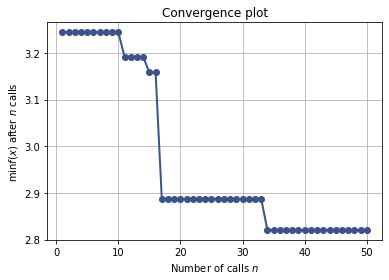

In [7]:
# convergence plot
plot_convergence(res_gp)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a15a08b38>,
      dtype=object)

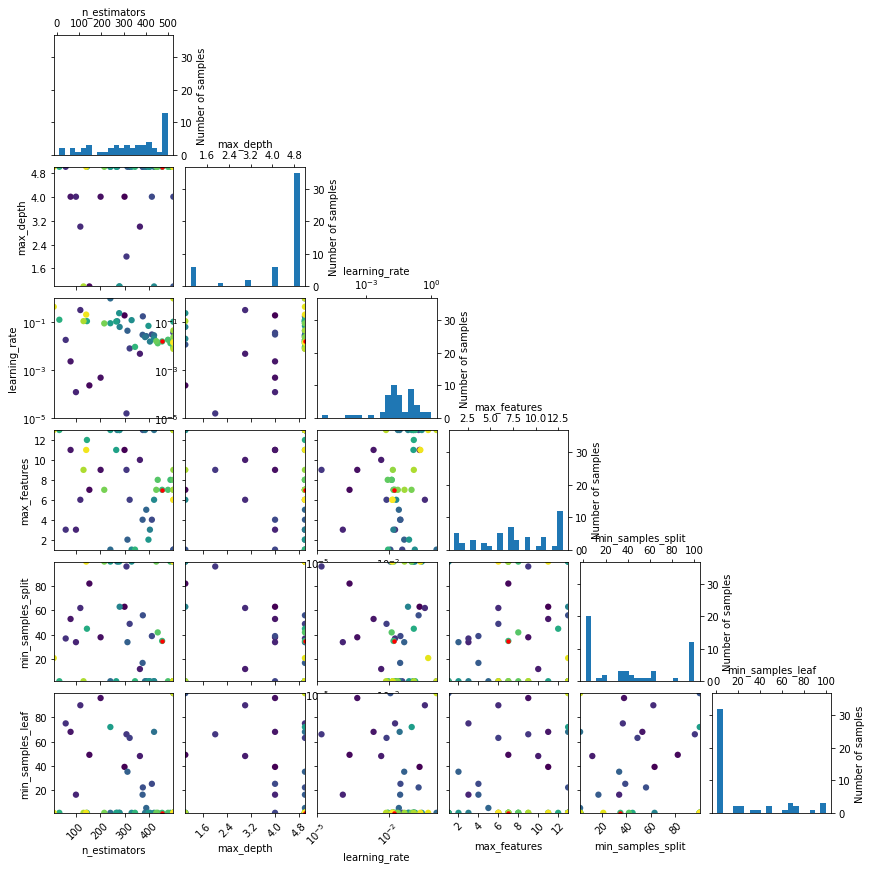

In [8]:
# evaluations plot
plot_evaluations(res_gp)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a17402160>,
      dtype=object)

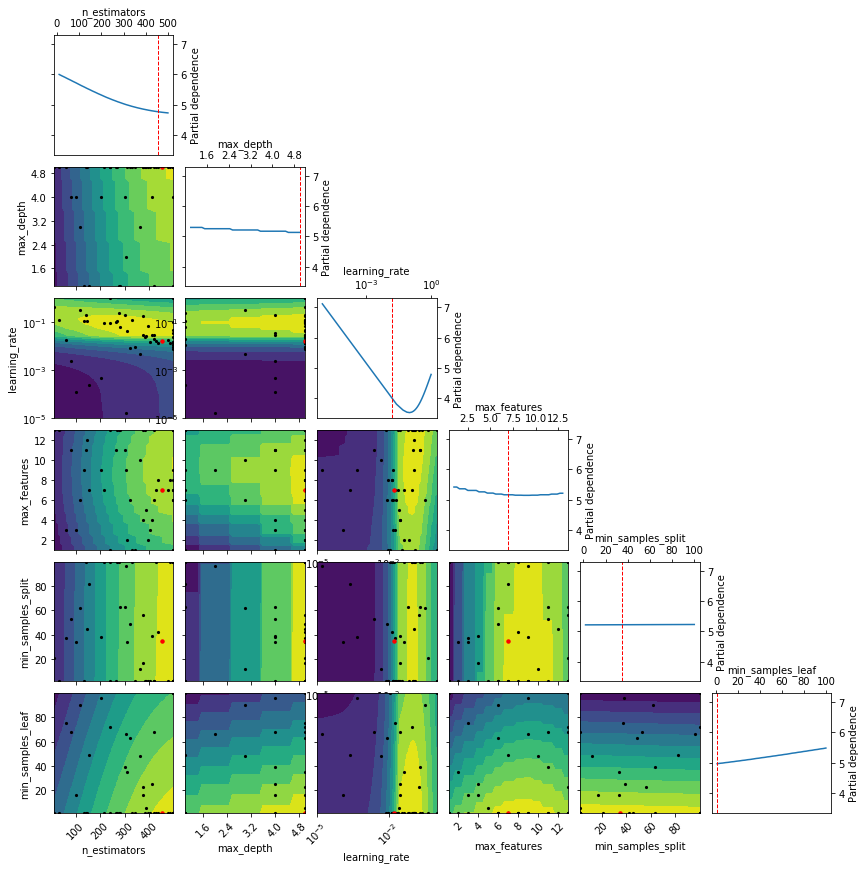

In [10]:
# objective plot
plot_objective(res_gp)